# 1 Create the dataset

### Import libraries

In [32]:
import os
import re
import csv
import pandas as pd
import geopandas as gpd
import string
import unicodedata
import seaborn as sns

### Read the dataset

In [33]:
#读数据
filename_ch = "data/children_info.csv"
filename_in = "data/income_per.csv"
filename_pa = "data/parent_edu.csv"

dfc = pd.read_csv(filename_ch, low_memory=False)
dfi = pd.read_csv(filename_in, low_memory=False)
dfp = pd.read_csv(filename_pa, low_memory=False)

df_lst=[dfc,dfi,dfp]

#检查数据
for d in df_lst:
    print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8735 entries, 0 to 8734
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pid            8735 non-null   int64 
 1   fid18          8735 non-null   int64 
 2   provcd18       8735 non-null   object
 3   urban18        8735 non-null   object
 4   gender_update  8735 non-null   object
 5   wa701code      8735 non-null   object
 6   wc3_b_2        8735 non-null   object
 7   ws3            8446 non-null   object
 8   ws4            8446 non-null   object
 9   ws5            8446 non-null   object
 10  ws602          8446 non-null   object
 11  ws604          8446 non-null   object
 12  wf501          8446 non-null   object
 13  wf502          8446 non-null   object
 14  wf601m         8446 non-null   object
 15  wf602m         8446 non-null   object
 16  wf603m         8446 non-null   object
 17  wf604m         8446 non-null   object
 18  wf801          8446 non-null

### Join and write

In [34]:
dfci = pd.merge(dfc,dfi,on='fid18',how='left')
df_all = pd.merge(dfci,dfp,on='pid',how='left')
df_all.to_csv("data/survey_data.csv",encoding="utf_8_sig",index=False)

# 2 Ordinal Logistic Regression Analysis

### Import libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report
import seaborn as sb

from sklearn.metrics import make_scorer, confusion_matrix
import warnings



sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

### Read data

In [36]:
survey_df = pd.read_csv('data/survey_data.csv', encoding = 'UTF-8', low_memory = False)
survey_df.head()
print(survey_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8735 entries, 0 to 8734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pid            8735 non-null   int64  
 1   fid18_x        8735 non-null   int64  
 2   provcd18       8735 non-null   object 
 3   urban18        8735 non-null   object 
 4   gender_update  8735 non-null   object 
 5   wa701code      8735 non-null   object 
 6   wc3_b_2        8735 non-null   object 
 7   ws3            8446 non-null   object 
 8   ws4            8446 non-null   object 
 9   ws5            8446 non-null   object 
 10  ws602          8446 non-null   object 
 11  ws604          8446 non-null   object 
 12  wf501          8446 non-null   object 
 13  wf502          8446 non-null   object 
 14  wf601m         8446 non-null   object 
 15  wf602m         8446 non-null   object 
 16  wf603m         8446 non-null   object 
 17  wf604m         8446 non-null   object 
 18  wf801   

## Data Cleanning

In [37]:
# Rename the columns
survey_df = survey_df.rename(columns={'wf501':'Chinese_score',
                                      'wf502':'Math_score',
                                      'provcd18':'Province',
                                      'urban18':'Household_type',
                                      'gender_update':'Gender',
                                      'wc3_b_2':'Edu_level',
                                      'ws602':'Keyschool',
                                      'ws604':'Keyclass',
                                      'wf601m':'P_StopTV',
                                      'wf602m':'P_Discuss',
                                      'wf603m':'P_Supervising',
                                      'wf604m':'P_Check_homework',
                                      'wf801':'C_Work_hard',
                                      'wf802':'C_Check_homwork',
                                      'wf803':'C_Self_discipline',
                                      'wf804':'C_Focus',
                                      'wt1':'C_Attend_extra_tourial_or_not',
                                      'wd503r':'Extra_tourial_fee',
                                      'fincome1':'Household_income_total',
                                      'tb4_a18_f':'F_Edu_level',
                                      'tb4_a18_m':'M_Edu_level'})

In [38]:
# Cutting and grouping 'income' and 'tourial fee'
# Set the break point
listBins = [0,1,99,999,9999,99999,999999,9999999]
# Set labels
listLabels = ['0','1-99','100-999','1000-9999','10000-99999','100000-999999','1000000及以上']

survey_df['Household_income_total'] = pd.cut(survey_df['Household_income_total'], bins=listBins, labels=listLabels, include_lowest=True)

In [43]:
# Set the break point
#listBins2 = [0,1,50,99,500,999,5000,9999,99999]
# Set labels
#listLabels2 = ['0','1-50','51-99','100-500','501-999','1000-5000','5001-9999','10000及以上']
#survey_df['Extra_tourial_fee'].astype('float64')
#survey_df['Extra_tourial_fee'] = pd.cut(survey_df['Extra_tourial_fee'], bins=listBins2, labels=listLabels2, include_lowest=True)

In [ ]:
survey_df.head()

In [ ]:
# Ordinal Data
survey_df['Chinese_score'] = survey_df['Chinese_score'].map({'差':1,
                                                                 '中':2,
                                                                 '良':3,
                                                                 '优':4})

survey_df['Math_score'] = survey_df['Math_score'].map({'差':1,
                                                           '中':2,
                                                           '良':3,
                                                           '优':4})

survey_df['P_StopTV'] = survey_df['P_StopTV'].map({'从不':1,
                                                       '很少（每月1次）':2,
                                                       '偶尔（每周1次）':3,
                                                       '经常（每周2-4次）':4,
                                                       '很经常（每周5-7次）':5})

survey_df['P_Discuss'] = survey_df['P_Discuss'].map({'从不':1,
                                                       '很少（每月1次）':2,
                                                       '偶尔（每周1次）':3,
                                                       '经常（每周2-4次）':4,
                                                       '很经常（每周5-7次）':5})

survey_df['P_Supervising'] = survey_df['P_Supervising'].map({'从不':1,
                                                       '很少（每月1次）':2,
                                                       '偶尔（每周1次）':3,
                                                       '经常（每周2-4次）':4,
                                                       '很经常（每周5-7次）':5})

survey_df['P_Check_homework'] = survey_df['P_Check_homework'].map({'从不':1,
                                                       '很少（每月1次）':2,
                                                       '偶尔（每周1次）':3,
                                                       '经常（每周2-4次）':4,
                                                       '很经常（每周5-7次）':5})

survey_df['C_Work_hard'] = survey_df['C_Work_hard'].map({'十分不同意':1,
                                                       '不同意':2,
                                                       '既不同意也不反对':3,
                                                       '同意':4,
                                                       '十分同意':5})

survey_df['C_Check_homwork'] = survey_df['C_Check_homwork'].map({'十分不同意':1,
                                                       '不同意':2,
                                                       '既不同意也不反对':3,
                                                       '同意':4,
                                                       '十分同意':5})

survey_df['C_Self_discipline'] = survey_df['C_Self_discipline'].map({'十分不同意':1,
                                                       '不同意':2,
                                                       '既不同意也不反对':3,
                                                       '同意':4,
                                                       '十分同意':5})

survey_df['C_Focus'] = survey_df['C_Focus'].map({'十分不同意':1,
                                                       '不同意':2,
                                                       '既不同意也不反对':3,
                                                       '同意':4,
                                                       '十分同意':5})

survey_df['Extra_tourial_fee'] = survey_df['Extra_tourial_fee'].map({'0':1,
                                                                     '1-50':2,
                                                                     '51-99':3,
                                                                     '100-500':4,
                                                                     '501-999':5,
                                                                     '1000-5000':6,
                                                                     '5001-9999':7,
                                                                     '10000及以上':8})

survey_df['Household_income_total'] = survey_df['Household_income_total'].map({'0':1,
                                                                               '1-99':2,
                                                                               '100-999':3,
                                                                               '1000-9999':4,
                                                                               '10000-99999':5,
                                                                               '100000-999999':6,
                                                                               '1000000及以上':7})

survey_df['F_Edu_level'] = survey_df['F_Edu_level'].map({'文盲/半文盲':1,
                                                     '小学':2,
                                                     '初中':3,
                                                     '高中':4,
                                                     '大专':5,
                                                     '大学本科':6,
                                                     '硕士':7})

survey_df['M_Edu_level'] = survey_df['M_Edu_level'].map({'文盲/半文盲':1,
                                                     '小学':2,
                                                     '初中':3,
                                                     '高中':4,
                                                     '大专':5,
                                                     '大学本科':6,
                                                     '硕士':7})

In [ ]:
survey_df.head(10)

In [ ]:
# Nominal data
survey_df['Household_type'] = survey_df['Household_type'].map({'城镇':'Urban',
                                                         '乡村':'Rural'})

survey_df['Gender'] = survey_df['Gender'].map({'男':'Male',
                                         '女':'Female'})

survey_df['Edu_level'] = survey_df['Edu_level'].map({'小学':'Primary',
                                               '初中':'Junior',
                                               '高中/中专/技校/职高':'Senior'})

survey_df['Keyschool'] = survey_df['Keyschool'].map({'是':'Yes',
                                               '否':'No'})

survey_df['Keyclass'] = survey_df['Keyclass'].map({'是重点班':'Yes',
                                             '不是重点班':'No'})

survey_df['C_Attend_extra_tourial_or_not'] = survey_df['C_Attend_extra_tourial_or_not'].map({'是':'Yes',
                                                                                       '否':'No'})

survey_df = pd.get_dummies(survey_df, columns=['Household_type'],prefix=['Household_type'])
survey_df = pd.get_dummies(survey_df, columns=['Gender'],prefix=['Gender'])
survey_df = pd.get_dummies(survey_df, columns=['Edu_level'],prefix=['Edu_level'])
survey_df = pd.get_dummies(survey_df, columns=['Keyschool'],prefix=['Keyschool'])
survey_df = pd.get_dummies(survey_df, columns=['Keyclass'],prefix=['Keyclass'])
survey_df = pd.get_dummies(survey_df, columns=['C_Attend_extra_tourial_or_not'],prefix=['C_Attend_extra_tourial_or_not'])

In [ ]:
#survey_df['Academic_performance'] = survey_df.apply(lambda x: x['Chinese_score'] + x['Math_score']-1, axis=1)
survey_df.head()

In [ ]:
survey_df.drop(survey_df[survey_df['Extra_tourial_fee'].isna()].index, inplace = True)
survey_df['Extra_tourial_fee'] = survey_df['Extra_tourial_fee'].astype('int64')
survey_df['Household_income_total'] = survey_df['Household_income_total'].astype('int64')
print(survey_df.isna().sum())
survey_df.info()

In [101]:
survey_df.to_csv('data/perfect_survey_data.csv', encoding = 'utf_8_sig', index = False)

# 2 Data Exploration

In [10]:
filename = 'data/perfect_survey_data.csv'
survey_df = pd.read_csv(filename, encoding='UTF-8', low_memory = False)
survey_df['Academic_performance'] = survey_df.apply(lambda x: x['Academic_performance']-1, axis=1)
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   pid                                3292 non-null   int64 
 1   Academic_performance               3292 non-null   int64 
 2   Chinese_score                      3292 non-null   int64 
 3   Math_score                         3292 non-null   int64 
 4   Province                           3292 non-null   object
 5   P_StopTV                           3292 non-null   int64 
 6   P_Discuss                          3292 non-null   int64 
 7   P_Supervising                      3292 non-null   int64 
 8   P_Check_homework                   3292 non-null   int64 
 9   C_Work_hard                        3292 non-null   int64 
 10  C_Check_homwork                    3292 non-null   int64 
 11  C_Self_discipline                  3292 non-null   int64 
 12  C_Focu

In [11]:
survey_df.drop(columns=['Chinese_score','Math_score'], axis = 1, inplace = True)

In [5]:
survey_df.describe(include = 'all')

,pid,Academic_performance,Province,P_StopTV,P_Discuss,P_Supervising,P_Check_homework,C_Work_hard,C_Check_homwork,C_Self_discipline,...,Household_income_total,F_Edu_level,M_Edu_level,Household_type_Urban,Gender_Male,Edu_level_Junior,Edu_level_Primary,Keyschool_Yes,Keyclass_Yes,C_Attend_extra_tourial_or_not_Yes
count,3.292000e+03,3292.000000,3292,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.00000,3292.000000,...,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
unique,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,甘肃省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.134550e+08,3.520049,NaN,3.352673,3.236634,3.967497,3.279769,3.637606,3.29192,3.722357,...,5.251519,2.935905,2.703827,0.432260,0.528858,0.240279,0.746659,0.260328,0.100547,0.203220
std,1.514522e+08,1.829207,NaN,1.306965,1.145541,1.021424,1.364272,1.026342,1.13539,0.965562,...,0.529226,1.181427,1.236318,0.495465,0.499242,0.427318,0.434991,0.438880,0.300773,0.402456
min,1.100201e+08,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.401994e+08,2.000000,NaN,2.000000,2.000000,4.000000,2.000000,3.000000,2.00000,4.000000,...,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.118821e+08,4.000000,NaN,4.000000,3.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,5.000000,3.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.200608e+08,5.000000,NaN,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,4.000000,...,6.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000


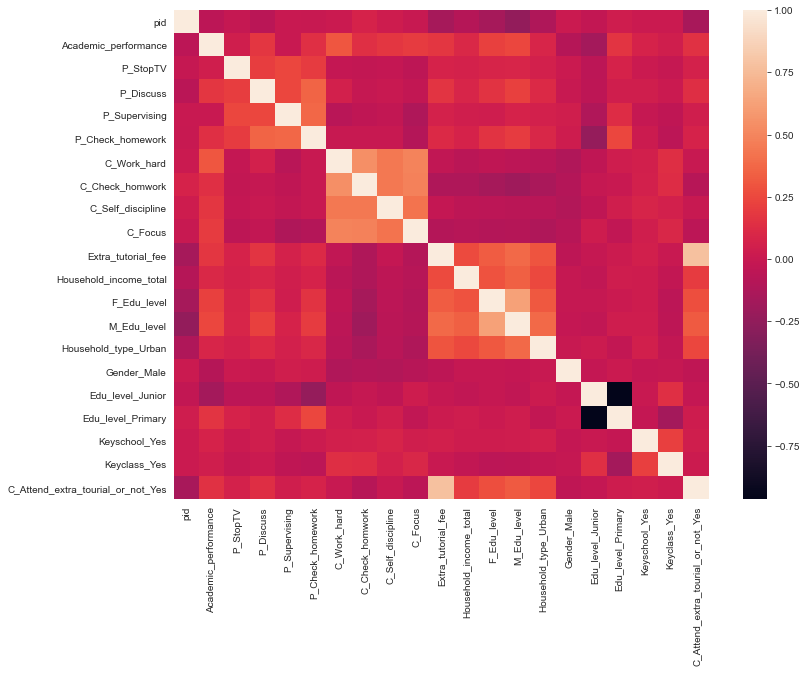

In [12]:
# Feature importance by correlation heatmap
corrmat = survey_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat);

This above correlation heatmap shows the correlation between each feature. We will take a closer look at the feature that are highly correlated to the target variable "Salary_Encoded". I will plot the heatmap for relevant features that have corr() value greater than and equal to 0.15 with target column. Althrough correlation heatmap is a great way to check the relationships between features, one of the draw back would be it works on the numerical data. Thus, I did this step after the one hot encoding.

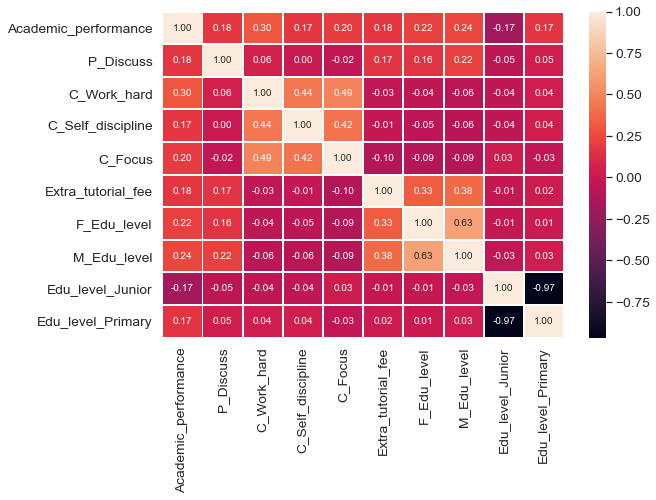

In [13]:
plt.figure(figsize=(9,6))
relevant_features = corrmat[abs(corrmat['Academic_performance'])>=0.15].index
cm = np.corrcoef(survey_df[relevant_features].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=relevant_features.values, xticklabels=relevant_features.values,linewidths=1)
plt.show()

<b>Which of the original attributes in the data are most related to a survey respondent's children's academic performance?

From the above correlation heatmap, we can see that the "C_Work_hard" feature has the highest corr value at 0.30 with the target value "Academic_performance" and "C_Work_hard" would be most related to children's achievement in school.

From this corr plot, we can also concluded that the salary are more related to experience.

Text(0.5, 1.0, 'Figure 1. Distribution of AP')

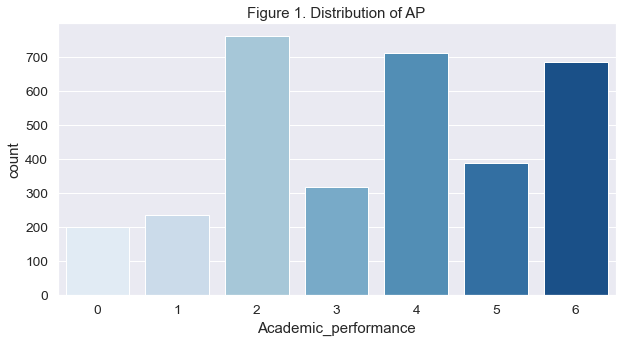

In [14]:
# Data Visualisation
plt.figure(figsize=(10,5))
plt1 = sns.countplot(x='Academic_performance',data=survey_df,palette="Blues")
plt1.set_title('Figure 1. Distribution of AP')

Text(0.5, 1.0, 'Figure 3. Relationship between Level of study effort and Acamedic Performance')

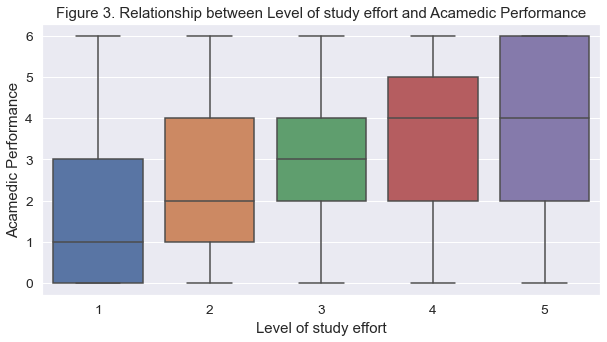

In [15]:
plt.figure(figsize=(10,5))

plt2 = sns.boxplot(x='C_Work_hard',y='Academic_performance',data=survey_df)
plt2.set(xlabel='Level of study effort',ylabel='Acamedic Performance')
plt2.axes.set_title('Figure 3. Relationship between Level of study effort and Acamedic Performance')

# 3 Feature Selection

In [19]:
# Use L1 Regularized Regression to select features
y = survey_df['Academic_performance']
X = survey_df.copy()
X.drop(['Academic_performance','pid','Province'], axis =1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   P_StopTV                           3292 non-null   int64
 1   P_Discuss                          3292 non-null   int64
 2   P_Supervising                      3292 non-null   int64
 3   P_Check_homework                   3292 non-null   int64
 4   C_Work_hard                        3292 non-null   int64
 5   C_Check_homwork                    3292 non-null   int64
 6   C_Self_discipline                  3292 non-null   int64
 7   C_Focus                            3292 non-null   int64
 8   Extra_tutorial_fee                 3292 non-null   int64
 9   Household_income_total             3292 non-null   int64
 10  F_Edu_level                        3292 non-null   int64
 11  M_Edu_level                        3292 non-null   int64
 12  Household_type_Urban

In [20]:
scaler = StandardScaler()
scaler.fit(X)

clf = SelectFromModel(Lasso(alpha=0.1))
clf.fit(scaler.transform(X),y)

clf_coef = clf.estimator_.coef_

features = pd.DataFrame(clf_coef,columns=['Lasso Coefficient'],index=X.columns).sort_values('Lasso Coefficient',ascending=False)
selected_features = features[features['Lasso Coefficient'] != 0]
selected_features

,Lasso Coefficient
C_Work_hard,0.407308
M_Edu_level,0.217950
Edu_level_Primary,0.179810
F_Edu_level,0.142907
C_Focus,0.120189
P_Discuss,0.100083
Extra_tutorial_fee,0.094300
P_Check_homework,0.014300
C_Self_discipline,0.001506


In [21]:
selected_features_name = selected_features.index.tolist()
# Create the new dataframe from the selected features
survey_df_new = survey_df[selected_features_name]
# Append the target column from the original df to the new df
survey_df_new['Academic_performance'] = survey_df['Academic_performance']
survey_df_new.head()

,C_Work_hard,M_Edu_level,Edu_level_Primary,F_Edu_level,C_Focus,P_Discuss,Extra_tutorial_fee,P_Check_homework,C_Self_discipline,Academic_performance
0,2,4,1,4,4,2,1,3,1,4
1,4,5,1,6,4,4,8,3,4,6
2,4,6,1,6,4,5,1,5,4,6
3,4,5,1,5,4,5,1,5,2,6
4,4,4,0,2,2,4,1,3,4,2


# 4 Model Implementation

## a. Oridinal Multi-class Classification

In [22]:
def classfier(row, seperater):
    if row['Academic_performance'] > seperater:
        return 1
    else:
        return 0

In [23]:
survey_df_new['0_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 0), axis=1)
survey_df_new['01_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 1), axis=1)
survey_df_new['012_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 2), axis=1)
survey_df_new['0123_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 3), axis=1)
survey_df_new['01234_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 4), axis=1)
survey_df_new['012345_and_other'] = survey_df_new.apply (lambda row: classfier(row,seperater = 5), axis=1)
survey_df_new['6'] = survey_df_new.apply (lambda row: classfier(row,seperater = 6), axis=1)

## b. Building Logistic Regression Model with 10 folds Cross Validation

In [24]:
# Seperate the test into train df and test df
train = survey_df_new
test = survey_df_new.sample(frac=0.25)

In [25]:
# Run Cross Validation on the train data with the dummy target values and calaulate the probabilities
kfold = KFold(n_splits=10)
scaler = StandardScaler()
kfold.get_n_splits(X)
model = LogisticRegression()

accuracy = np.zeros(10)
np_idx = 0

X = train[selected_features_name]
y = train['Academic_performance']

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)    


    y_0 = train['0_and_other']
    y_train_0, y_test_0 = y_0.values[train_idx], y_0.values[test_idx]  
    model.fit(X_train,y_train_0)
    y_predictions_0 = model.predict(X_test)
    y_probabilities_0 = model.predict_proba(X_test)
    pr_0 = pd.Series(y_probabilities_0[:,0])
    #result['pr_0'] = pd.Series(y_probabilities_0[:,0])

    y_1 = train['01_and_other']
    y_train_1, y_test_1 = y_1.values[train_idx], y_1.values[test_idx]    
    model.fit(X_train, y_train_1)
    y_predictions_1=model.predict(X_test)
    y_probabilities_1=model.predict_proba(X_test)
    pr_1 = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])
    #result['pr_1'] = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])

    y_2 = train['012_and_other']
    y_train_2, y_test_2 = y_2.values[train_idx], y_2.values[test_idx]    
    model.fit(X_train, y_train_2)
    y_predictions_2=model.predict(X_test)
    y_probabilities_2=model.predict_proba(X_test)
    pr_2 = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])
    #result['pr_2'] = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])

    y_3 = train['0123_and_other']
    y_train_3, y_test_3 = y_3.values[train_idx], y_3.values[test_idx]    
    model.fit(X_train,y_train_3)
    y_predictions_3=model.predict(X_test)
    y_probabilities_3=model.predict_proba(X_test)
    pr_3 = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])
    #result['pr_3'] = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])

    y_4 = train['01234_and_other']
    y_train_4, y_test_4 = y_4.values[train_idx], y_4.values[test_idx]    
    model.fit(X_train,y_train_4)
    y_predictions_4=model.predict(X_test)
    y_probabilities_4=model.predict_proba(X_test)
    pr_4 = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])
    #result['pr_4'] = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])

    y_5 = train['012345_and_other']
    y_train_5, y_test_5 = y_5.values[train_idx], y_5.values[test_idx]    
    model.fit(X_train,y_train_5)
    y_predictions_5=model.predict(X_test)
    y_probabilities_5=model.predict_proba(X_test)
    pr_5 = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])
    #result['pr_5'] = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])

    pr_6 = pd.Series(y_probabilities_5[:,1])
    #result['pr_6'] = pd.Series(y_probabilities_13[:,1])
    
    result = pd.DataFrame()

    result = pd.concat([result, pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6],axis=1)
    result['assigned_AP'] = result[[0,1,2,3,4,5,6]].idxmax(axis=1)
    result['y_test'] = y_test
    y_predict = result.assigned_AP.tolist()


    TN = confusion_matrix(y_test, y_predict)[0][0]
    FP = confusion_matrix(y_test, y_predict)[0][1]
    FN = confusion_matrix(y_test, y_predict)[1][0]
    TP = confusion_matrix(y_test, y_predict)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)

    accuracy[np_idx] = ACC*100
    np_idx += 1
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 75.0%
Fold 2: Accuracy: 66.667%
Fold 3: Accuracy: 66.667%
Fold 4: Accuracy: 66.667%
Fold 5: Accuracy: 50.0%
Fold 6: Accuracy: 75.0%
Fold 7: Accuracy: 100.0%
Fold 8: Accuracy: 50.0%
Fold 9: Accuracy: 28.571%
Fold 10: Accuracy: 66.667%
Average Score: 64.524%(17.919%)


In [28]:
result.head(10)

,0,1,2,3,4,5,6,assigned_AP,y_test
0,0.018576,0.046574,0.226462,0.093712,0.198948,0.133249,0.282478,6,0
1,0.115019,0.207397,0.277476,0.112906,0.170137,0.056819,0.060247,2,3
2,0.158552,0.163316,0.304364,0.095261,0.171462,0.054406,0.052639,2,2
3,0.157258,0.178807,0.308511,0.092541,0.157591,0.053791,0.051500,2,0
4,0.220477,0.134063,0.338844,0.095922,0.133799,0.044267,0.032628,2,5
5,0.061569,0.089835,0.308966,0.112393,0.203526,0.090406,0.133304,2,1
6,0.078424,0.151657,0.327957,0.137938,0.160996,0.085097,0.057931,2,3
7,0.038454,0.060997,0.248500,0.106705,0.244147,0.109110,0.192087,2,2
8,0.039817,0.094748,0.299840,0.141403,0.198651,0.127156,0.098384,2,5
9,0.208057,0.166883,0.309531,0.105228,0.135278,0.042315,0.032708,2,2


# 5 Model Tuning

In [26]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

X = train[selected_features_name]
y = train['Academic_performance']

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)    
            


            y_0 = train['0_and_other']
            y_train_0, y_test_0 = y_0.values[train_idx], y_0.values[test_idx]  
            model.fit(X_train,y_train_0)
            y_predictions_0 = model.predict(X_test)
            y_probabilities_0 = model.predict_proba(X_test)
            pr_0 = pd.Series(y_probabilities_0[:,0])

            y_1 = train['01_and_other']
            y_train_1, y_test_1 = y_1.values[train_idx], y_1.values[test_idx]    
            model.fit(X_train, y_train_1)
            y_predictions_1=model.predict(X_test)
            y_probabilities_1=model.predict_proba(X_test)
            pr_1 = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])

            y_2 = train['012_and_other']
            y_train_2, y_test_2 = y_2.values[train_idx], y_2.values[test_idx]    
            model.fit(X_train, y_train_2)
            y_predictions_2=model.predict(X_test)
            y_probabilities_2=model.predict_proba(X_test)
            pr_2 = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])

            y_3 = train['0123_and_other']
            y_train_3, y_test_3 = y_3.values[train_idx], y_3.values[test_idx]    
            model.fit(X_train,y_train_3)
            y_predictions_3=model.predict(X_test)
            y_probabilities_3=model.predict_proba(X_test)
            pr_3 = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])

            y_4 = train['01234_and_other']
            y_train_4, y_test_4 = y_4.values[train_idx], y_4.values[test_idx]    
            model.fit(X_train,y_train_4)
            y_predictions_4=model.predict(X_test)
            y_probabilities_4=model.predict_proba(X_test)
            pr_4 = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])

            y_5 = train['012345_and_other']
            y_train_5, y_test_5 = y_5.values[train_idx], y_5.values[test_idx]    
            model.fit(X_train,y_train_5)
            y_predictions_5=model.predict(X_test)
            y_probabilities_5=model.predict_proba(X_test)
            pr_5 = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])
            
            pr_6 = pd.Series(y_probabilities_5[:,1])
            
            result = pd.DataFrame()

            result = pd.concat([result, pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6],axis=1)
            result['assigned_AP'] = result[[0,1,2,3,4,5,6]].idxmax(axis=1)
            result['y_test'] = y_test

            y_predict = result.assigned_AP.tolist()


            TN = confusion_matrix(y_test, y_predict)[0][0]
            FP = confusion_matrix(y_test, y_predict)[0][1]
            FN = confusion_matrix(y_test, y_predict)[1][0]
            TP = confusion_matrix(y_test, y_predict)[1][1]
            total = TN + FP + FN + TP
            
            ACC = (TP + TN) / float(total)
            
            accuracy[np_idx] = ACC*100
            np_idx += 1

    print("For C=",C,"Solver=",solver,'\n',classification_report(y_test, y_predict))

    if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

For C= 0.001 Solver= sag 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        27
           2       0.31      0.62      0.41        84
           3       0.00      0.00      0.00        33
           4       0.21      0.17      0.19        66
           5       0.00      0.00      0.00        32
           6       0.36      0.60      0.45        65

    accuracy                           0.31       329
   macro avg       0.13      0.20      0.15       329
weighted avg       0.19      0.31      0.23       329

For C= 0.01 Solver= sag 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       1.00      0.04      0.07        27
           2       0.31      0.56      0.40        84
           3       0.00      0.00      0.00        33
           4       0.21      0.23      0.22        66
           5       0.00  

In [29]:
print (best_params)
print ("Best Score: {}%(11.276%)".format(round(best_accuracy,3)))      
print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of 11.276%".format(best_params['C'],best_params['solver'],round(best_accuracy,3)))

{'C': 0.05, 'solver': 'sag'}
Best Score: 66.167%(11.276%)

The optimal log model uses C=0.05, and a sag solver, and has a cross validation score of 66.167% with a standard deviation of 11.276%


# 6 Testing and Discussion

## a. Testing the test data with the optimal model

In [62]:
# Testing the test data with the optimal model
best_model = LogisticRegression(C = 0.05, solver= 'sag')
scaler = StandardScaler()

X_train = train[selected_features_name]
y_train = train['Academic_performance']

X_test = test[selected_features_name]
y_test = test['Academic_performance']


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_0 = train['0_and_other']
best_model.fit(X_train,y_train_0)
y_predictions_0 = best_model.predict(X_test)
y_probabilities_0 = best_model.predict_proba(X_test)
pr_0 = pd.Series(y_probabilities_0[:,0])

y_train_1 = train['01_and_other']
best_model.fit(X_train, y_train_1)
y_predictions_1=best_model.predict(X_test)
y_probabilities_1=best_model.predict_proba(X_test)
pr_1 = pd.Series(y_probabilities_0[:,1] - y_probabilities_1[:,1])

y_train_2 = train['012_and_other']
best_model.fit(X_train, y_train_2)
y_predictions_2=best_model.predict(X_test)
y_probabilities_2=best_model.predict_proba(X_test)
pr_2 = pd.Series(y_probabilities_1[:,1] - y_probabilities_2[:,1])

y_train_3 = train['0123_and_other']
best_model.fit(X_train,y_train_3)
y_predictions_3=best_model.predict(X_test)
y_probabilities_3=best_model.predict_proba(X_test)
pr_3 = pd.Series(y_probabilities_2[:,1] - y_probabilities_3[:,1])

y_train_4 = train['01234_and_other']
best_model.fit(X_train,y_train_4)
y_predictions_4=best_model.predict(X_test)
y_probabilities_4=best_model.predict_proba(X_test)
pr_4 = pd.Series(y_probabilities_3[:,1] - y_probabilities_4[:,1])

y_train_5 = train['012345_and_other']
best_model.fit(X_train,y_train_5)
y_predictions_5=best_model.predict(X_test)
y_probabilities_5=best_model.predict_proba(X_test)
pr_5 = pd.Series(y_probabilities_4[:,1] - y_probabilities_5[:,1])

pr_6 = pd.Series(y_probabilities_5[:,1])

result2 = pd.DataFrame()
result2 = pd.concat([result2, pr_0, pr_1, pr_2, pr_3, pr_4, pr_5, pr_6],axis=1)
result2['assigned_AP'] = result2[[0,1,2,3,4,5,6]].idxmax(axis=1)
y_predict2 = result2.assigned_AP.tolist()

TN = confusion_matrix(y_test, y_predict2)[0][0]
FP = confusion_matrix(y_test, y_predict2)[0][1]
FN = confusion_matrix(y_test, y_predict2)[1][0]
TP = confusion_matrix(y_test, y_predict2)[1][1]
total = TN + FP + FN + TP
            
ACC = (TP + TN) / float(total)
            
accuracy = round(ACC*100,3)

print('The accuracy of model is',accuracy,'%')

The accuracy of model is 81.25 %


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 2799 to 315
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   C_Work_hard           823 non-null    int64
 1   M_Edu_level           823 non-null    int64
 2   Edu_level_Primary     823 non-null    int64
 3   F_Edu_level           823 non-null    int64
 4   C_Focus               823 non-null    int64
 5   P_Discuss             823 non-null    int64
 6   Extra_tourial_fee     823 non-null    int64
 7   P_Check_homework      823 non-null    int64
 8   C_Self_discipline     823 non-null    int64
 9   Academic_performance  823 non-null    int64
 10  0_and_other           823 non-null    int64
 11  01_and_other          823 non-null    int64
 12  012_and_other         823 non-null    int64
 13  0123_and_other        823 non-null    int64
 14  01234_and_other       823 non-null    int64
 15  012345_and_other      823 non-null    int64
 16  6    

In [31]:
# print the coefficient in the model
X_coef = test[selected_features_name]
print("Coefficients for each variable:")
coef_dict = {}
for coef, feat in zip(best_model.coef_.flatten().tolist(),X_coef):
    coef_dict[feat] = coef
    print(feat, ":", round(coef,3))

Coefficients for each variable:
C_Work_hard : 0.527
M_Edu_level : 0.226
Edu_level_Primary : 0.439
F_Edu_level : 0.267
C_Focus : 0.226
P_Discuss : 0.176
Extra_tutorial_fee : 0.061
P_Check_homework : 0.037
C_Self_discipline : 0.168


In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    #plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
     #                train_scores_mean + train_scores_std, alpha=0.1, \
      #               color="r")
    #plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
      #                test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score mean")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validating score mean")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

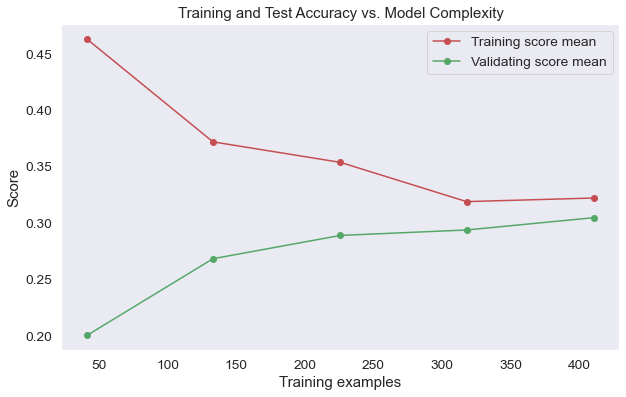

In [73]:
plot_learning_curve(best_model,'Training and Test Accuracy vs. Model Complexity', test[selected_features_name], test['Academic_performance'],cv=2)

## b. Distribution of the algorithm accuacy

<function matplotlib.pyplot.show(close=None, block=None)>

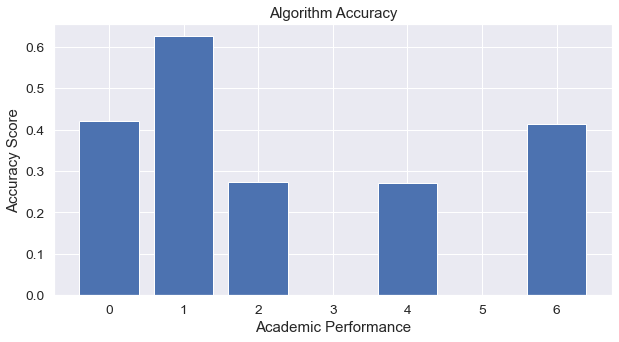

In [74]:
report = classification_report(y_test, y_predict2,output_dict=True)

class_acc = []
class_acc.append(report['0']['precision'])
class_acc.append(report['1']['precision'])
class_acc.append(report['2']['precision'])
class_acc.append(report['3']['precision'])
class_acc.append(report['4']['precision'])
class_acc.append(report['5']['precision'])
class_acc.append(report['6']['precision'])

plt.figure(figsize=(10,5))
bars = ('0','1','2','3','4','5','6')
plt.bar(bars, class_acc)
plt.xlabel('Academic Performance')
plt.ylabel('Accuracy Score')
plt.title('Algorithm Accuracy')
plt.show